In [199]:
import pandas as pd
import re

In [200]:
#used the dataset from the kaggle which is a open source platform https://www.kaggle.com/code/arunrk7/nlp-beginner-text-classification-using-lstm/data

df = pd.read_csv('sentimentData.csv')

df.columns = ["sentiment", "ids", "date", "flag", "user", "text"]
df.head(5)

,sentiment,ids,date,flag,user,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [201]:
df = df[['sentiment', 'text']]
df.head(5)



,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [202]:
df['sentiment'] = df['sentiment'].replace(4,1)



print(df.sentiment.value_counts())

1    800000
0    799999
Name: sentiment, dtype: int64


In [203]:
#from 1600000 data I have only used 500 dataset to design the model
import random
random_idx_list = [random.randint(1,len(df.text)) for i in range(500)] # creates random indexes to choose from dataframe
df = df.loc[random_idx_list,:]

df.head()

,sentiment,text
1534863,1,@mrjcrump im a good girl i usually behave @ pa...
244308,0,I don't feeeel gooood. Ugh I'm about to watch...
561128,0,Schools finally out! Which is amazing cause it...
1063558,1,"@timhillmcr cool!!! Brings the money in, pays ..."
1553315,1,@themalegoodbye can't quite picture that


In [204]:
sentiment = df['sentiment']
text = df['text']


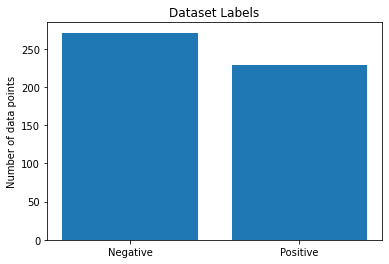

In [205]:
from matplotlib import pyplot as plt

xs = [i for i in range(0,2)]

plt.bar(xs, df.sentiment.value_counts())
plt.ylabel('Number of data points')
plt.title('Dataset Labels')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


In [206]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [207]:
text = list(df['text']);
sentiment = list(df['sentiment'])


In [208]:
#preprocessing text

def preProcess(textData):
       preProcessText = []

       wordnet = WordNetLemmatizer()
       for text in textData:
              text = text.lower()
              urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)" 
              text = re.sub(r'@[^\s]+', '', text) # removing the username 
              text = re.sub(r'[0-9]+', '', text) #removing the numbers
              text = re.sub(r'#', '', text) #removing the hastags
              text = re.sub(r'[^A-Za-z0-9]+',' ', text) #removing the special character
              text = re.sub(r'RT[\s]+', '', text) #removing retweets
              text = re.sub(urlPattern, '', text) #removing the hyper link/url
              
              textWords = text.split()

              #performing the lemmatization on the each words
              textWords = [wordnet.lemmatize(word) for word in textWords if not word in set(stopwords.words('english'))] 
              textWords = " ".join(textWords)

              preProcessText.append(textWords)

       return preProcessText          

In [210]:
text = preProcess(text)


print(text[:10])
print(sentiment[:10])


['im good girl usually behave party', 'feeeel gooood ugh watch youtube video make laugh funnyyyyy', 'school finally amazing cause middle june cat attacked morning sleeping', 'cool brings money pay vodka', 'quite picture', 'landed new contract', 'lady went sam bradley last night dm yer email send pic', 'nafisa teehee prom', 'kitteh sleep ironing board computer open eye time stare', 'even triple strength coffee waking morning fb']
[1, 0, 0, 1, 1, 1, 1, 1, 1, 0]


In [211]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [212]:
cv = CountVectorizer(ngram_range=(1,3))
X = cv.fit_transform(text).toarray()


In [213]:
len(cv.get_feature_names())

6729

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, sentiment, test_size=0.30, random_state=0)

In [215]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [216]:
y_pred = model.predict(X_test)

In [217]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

c_matix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(c_matix)
print(accuracy)

[[48 34]
 [21 47]]
0.6333333333333333


In [218]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

max_accuracy = 0
for alpha in np.arange(0, 1, 0.1):
       sub_classifier = MultinomialNB(alpha=alpha)
       sub_classifier.fit(X_train, y_train)
       y_pred = sub_classifier.predict(X_test)
       accuracy = accuracy_score(y_test, y_pred)
       if accuracy>max_accuracy:
              max_accuracy=accuracy
              classifier = sub_classifier
       print("Alpha: {}, Accuracy: {}".format(alpha, accuracy))

C:\Users\HP\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Accuracy: 0.6266666666666667
Alpha: 0.1, Accuracy: 0.6266666666666667
Alpha: 0.2, Accuracy: 0.62
Alpha: 0.30000000000000004, Accuracy: 0.6
Alpha: 0.4, Accuracy: 0.6
Alpha: 0.5, Accuracy: 0.6
Alpha: 0.6000000000000001, Accuracy: 0.6066666666666667
Alpha: 0.7000000000000001, Accuracy: 0.6133333333333333
Alpha: 0.8, Accuracy: 0.6266666666666667
Alpha: 0.9, Accuracy: 0.6333333333333333
